# Compare DQN improvements
- Double DQN
- Dueling DQN
- Prioritized experience replay

In [1]:
import random 

In [ ]:
random.sample()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Load scores

In [11]:
dqn_64_64_64, double_dqn = [
    pd.read_csv(f'../experiments/{experiment}/scores.csv')
    for experiment in ['dqn_64_64', 'double_dqn']]

## Comparison graphs

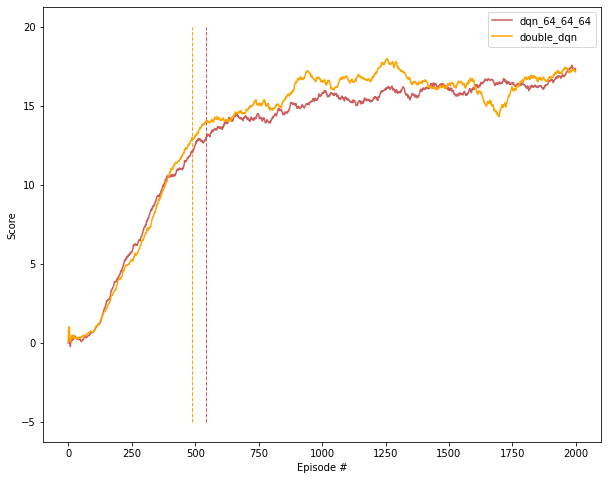

In [12]:
plt.figure(figsize=(10, 8))
plt.xlabel('Episode #')
plt.ylabel('Score')

for scores, name, color in [
    [dqn_64_64_64, 'dqn_64_64_64', 'indianred'], 
    [double_dqn, 'double_dqn', 'orange']
]:

    ylim = (-5, 20)
    smoothened_scores = scores['score'].rolling(window=100, min_periods=0).mean()
    solution_episode = scores['episode'][smoothened_scores >= 13.0].iloc[0]
    
    plt.plot(scores['episode'], smoothened_scores, color=color, label=name)
    plt.vlines(solution_episode, *ylim, color=color, linestyle='--', linewidth=1)

plt.legend()
plt.savefig('../artifacts/dqn_improvements_comparison.png')
plt.show()